# 初期設定

In [1]:
import numpy as np
import cv2
from Tennis_observation import *
from Tennis_action import *
from window_controlle import *
import re
import sys
import copy
import os
import random
import matplotlib.pyplot as plt
import threading
import subprocess
import time
from win32 import win32gui

# スコア取得で結合しない

In [38]:
left = 1087
top = 30
width = 705
height = 545

In [810]:
frame = grab_screen(left, top, width, height, True)

In [811]:
imshow(frame)

In [812]:
frame.shape

(545, 705)

#lower left
xll_1 = 134
xll_2 = 224
yll_1 = 430
yll_2 = 489

#lower right
xlr_1 = 585
xlr_2 = 655
ylr_1 = 435
ylr_2 = 480

#upper left
xul_1 = 145
xul_2 = 215
yul_1 = 45
yul_2 = 90

#upper right
xur_1 = 585
xur_2 = 655
yur_1 = 45
yur_2 = 90

In [813]:
shape = (45, 70)

In [814]:
#lower left -- ok
xll_1 = 146
xll_2 = xll_1 + shape[1]
yll_1 = 435
yll_2 = yll_1 + shape[0]

# lower right --standard
xlr_1 = 585
xlr_2 = xlr_1 + shape[1]
ylr_1 = 435
ylr_2 = ylr_1 + shape[0]

# upper left
xul_1 = 146
xul_2 = xul_1 + shape[1]
yul_1 = 44
yul_2 = yul_1 + shape[0]

# upper right --ok
xur_1 = 585
xur_2 = xur_1 + shape[1]
yur_1 = 44
yur_2 = yur_1 + shape[0]

In [815]:
pos_list = [[yll_1, yll_2, xll_1, xll_2],
            [ylr_1, ylr_2, xlr_1, xlr_2],
            [yul_1, yul_2, xul_1, xul_2],
            [yur_1, yur_2, xur_1, xur_2]]

In [816]:
pos_num = 1

In [817]:
img_score = frame[pos_list[pos_num][0]:pos_list[pos_num][1], pos_list[pos_num][2]:pos_list[pos_num][3]]

In [818]:
imshow(img_score)

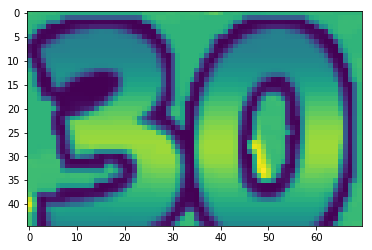

In [819]:
plt.imshow(img_score)

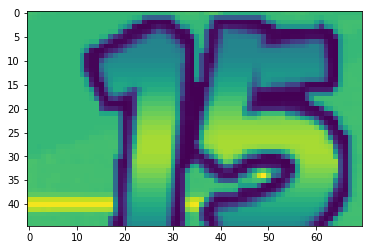

In [820]:
plt.imshow(img_template)

In [821]:
img_template = cv2.imread('../images/score_template/lower_right/score_15.png')

In [822]:
img_template = cv2.cvtColor(img_template, cv2.COLOR_BGR2GRAY)

In [823]:
result = cv2.matchTemplate(img_score, img_template, cv2.TM_CCOEFF_NORMED)

In [824]:
result

array([[0.2193224]], dtype=float32)

In [825]:
img_score.shape

(45, 70)

In [826]:
imshow(img_score)

In [827]:
pos_name = ['lower_left', 'lower_right', 'upper_left', 'upper_right']

In [828]:
pos_name[pos_num]

'lower_right'

In [829]:
score = '30'

In [830]:
cv2.imwrite('../images/score_template/{}/score_{}.png'.format(pos_name[pos_num], score), img_score)

True

In [848]:
a = np.array([[0,0,0,1],[0,0,0,0]])

In [855]:
a.sum()

1

In [853]:
a.sum(axis=0)

array([0, 0, 0, 1])

In [854]:
a.sum(axis=0).sum()

1

In [850]:
np.argmax()

3

In [858]:
result[0][0]

0.2193224

In [843]:
a = {1:2, 99:4}

In [844]:
a[99]

4

In [237]:
img_template = cv2.imread('../images/score_template/lower_right/score_15.png')

In [241]:
img_template = cv2.cvtColor(img_template, cv2.COLOR_BGR2GRAY)

In [242]:
result = cv2.matchTemplate(img_score, img_template, cv2.TM_CCOEFF_NORMED)

In [243]:
result

array([[1.]], dtype=float32)

In [14]:
pos_list = [xll_1 * width - size_delta,xll_2 * width + size_delta, yll_1 * height - size_delta,yll_2 * height + size_delta,
            xlr_1 * width - size_delta,xlr_2 * width + size_delta, ylr_1 * height - size_delta,ylr_2 * height + size_delta,
            xul_1 * width - size_delta,xul_2 * width + size_delta, yul_1 * height - size_delta,yul_2 * height + size_delta,
            xur_1 * width - size_delta,xur_2 * width + size_delta, yur_1 * height - size_delta,yur_2 * height + size_delta]


In [17]:
pos_list = list(np.array(pos_list).astype(int))

In [18]:
pos_list

[134, 224, 430, 489, 575, 664, 430, 489, 134, 224, 39, 99, 575, 664, 39, 99]

# 中心の画像からスコア取得

In [537]:
left = 1087
top = 30
width = 705
height = 545

In [544]:
#serverのフラグ
#score center
server_score_left = 170
server_score_top = 220
server_score_right = 310
server_score_bottom = 320

receiver_score_left = 395
receiver_score_top = 220
receiver_score_right = 535
receiver_score_bottom = 320

threshold_server = 0.7

In [559]:
frame = grab_screen(left, top, width, height, True)

In [560]:
img_score = cv2.imread('../images/score_center/server/02_server_score_15.png')

In [561]:
img_score = cv2.cvtColor(img_score, cv2.COLOR_BGR2GRAY)

In [562]:
imshow(frame)

In [563]:
img_server = frame[server_score_top:server_score_bottom, server_score_left:server_score_right]

In [564]:
img_receiver = frame[receiver_score_top:receiver_score_bottom, receiver_score_left:receiver_score_right]

In [565]:
imshow(img_server)

In [566]:
imshow(img_receiver)

In [567]:
imshow(img_score)

In [568]:
img_server.shape

(100, 140)

In [569]:
img_receiver.shape

(100, 140)

In [570]:
imshow(img_server)

In [571]:
result = cv2.matchTemplate(img_score, img_server, cv2.TM_CCOEFF_NORMED)

In [572]:
result[0][0]

0.8745481

In [574]:
#score
score_value_list = ['0', '15', '30', '40', '40', '60', '99']

#server
path_to_temp_server = '../images/score_center/server/'
name_temp_server_list = os.listdir(path_to_temp_server)

#server
path_to_temp_receiver = '../images/score_center/receiver/'
name_temp_receiver_list = os.listdir(path_to_temp_receiver)

threshold_score = 0.7

img_temp_server = []
img_temp_receiver = []
img_temp_server

for path in name_temp_server_list:
    img = cv2.imread(path_to_temp_server + path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_temp_server.append(img)


for path in name_temp_receiver_list:
    img = cv2.imread(path_to_temp_receiver + path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_temp_receiver.append(img)

In [577]:
imshow(img_temp_receiver[0])

In [595]:
#def score_check(frame):
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

img_server = frame[server_score_top:server_score_bottom, server_score_left:server_score_right]
img_receiver = frame[receiver_score_top:receiver_score_bottom, receiver_score_left:receiver_score_right]

score_server_list = []
score_receiver_list = []

# server
for img_temp_num in range(len(img_temp_server)):  # 0 ~ adv
    result = cv2.matchTemplate(img_server, img_temp_server[img_temp_num], cv2.TM_CCOEFF_NORMED)

    score_server = result[0][0]
    score_server_list.append(score_server)
    score_server_array = np.array(score_server_list)

# receiver
for img_temp_num in range(len(img_temp_receiver)):  # 0 ~ adv
    result = cv2.matchTemplate(img_receiver, img_temp_receiver[img_temp_num], cv2.TM_CCOEFF_NORMED)

    score_receiver = result[0][0]
    score_receiver_list.append(score_receiver)
    score_receiver_array = np.array(score_receiver_list)

server_score = np.nan
receiver_score = np.nan

if np.sum(score_server_array > threshold_score) > 0:
    idx_server_score = np.argmax(score_server_array)
    server_score = score_value_list[idx_server_score]

if np.sum(score_receiver_array > threshold_score) > 0:
    idx_receiver_score = np.argmax(score_receiver_array)
    receiver_score = score_value_list[idx_receiver_score]

score = (server_score, receiver_score)

#return score

In [596]:
score

('15', '40')

In [599]:
score_server_array

array([ 0.26913223,  0.8745481 ,  0.26136628,  0.445133  , -0.01535897,
       -0.03730145], dtype=float32)

In [598]:
score_receiver_array

array([0.04991496, 0.3702308 , 0.5615913 , 0.7796417 , 0.2177083 ,
       0.09858876], dtype=float32)

In [592]:
frame = grab_screen(left, top, width, height, False)

In [593]:
frame

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 76,  94,  92],
        [ 86, 105, 103],
        [ 67,  79,  72],
        ...,
        [ 74, 156,  57],
        [ 74, 156,  57],
        [ 75, 156,  57]],

       [[ 73,  89,  89],
        [ 85, 103, 104],
        [ 68,  80,  78],
        ...,
        [ 69, 155,  56],
        [ 69, 154,  56],
        [ 69, 152,  56]],

       ...,

       [[160, 150,  66],
        [158, 150,  66],
        [159, 150,  66],
        ...,
        [156, 140,  62],
        [156, 140,  62],
        [156, 140,  62]],

       [[163, 150,  66],
        [160, 150,  66],
        [157, 150,  66],
        ...,
        [155, 140,  62],
        [155, 140,  62],
        [155, 141,  62]],

       [[157, 147,  66],
        [157, 147,  66],
        [157, 147,  66],
        ...,
        [150, 140,  62],
        [151, 140,  62],
        [151, 140,  62]]

In [594]:
score_check(frame)

('15', '40')

In [465]:
cv2.imwrite('../images/score_center/receiver_score_deuce.png', img_receiver)

True

In [96]:
temp_mario = cv2.imread('../images/server/server_mario.png')

In [97]:
temp = cv2.imread('../images/server/server_luigi.png')

In [98]:
imshow(temp)

In [99]:
temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

In [100]:
frame = frame[server_top:server_bottom, server_left:server_right]

In [101]:
result = cv2.matchTemplate(frame, temp, cv2.TM_CCOEFF_NORMED)

error: OpenCV(3.4.5) C:\projects\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:589: error: (-215:Assertion failed) corrsize.height <= img.rows + templ.rows - 1 && corrsize.width <= img.cols + templ.cols - 1 in function 'cv::crossCorr'


In [102]:
result

array([[0.9614996]], dtype=float32)

In [95]:
len(np.where(result > threshold_server)[0])

1

# サーバー確認のための画像取得

In [138]:
#serverのフラグ
server_left = 85
server_top = 240
server_right = 155
server_bottom = 310

img_server_mario = cv2.imread('../images/server/server_mario.png')
img_server_mario = cv2.cvtColor(img_server_mario, cv2.COLOR_BGR2GRAY)

img_server_luigi = cv2.imread('../images/server/server_luigi.png')
img_server_luigi = cv2.cvtColor(img_server_luigi, cv2.COLOR_BGR2GRAY)


threshold_server = 0.9

In [139]:
server_flag = {'flag':1}

In [140]:
frame_current = {'frame':grab_screen(left, top, width, height, False)}

In [143]:
def server_judge(server_flag, img_server_mario, img_server_luigi):
    frame = frame_current['frame'][server_top:server_bottom, server_left:server_right]
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    result_mario = cv2.matchTemplate(frame, img_server_mario, cv2.TM_CCOEFF_NORMED)
    result_luigi = cv2.matchTemplate(frame, img_server_luigi, cv2.TM_CCOEFF_NORMED)

    server_flag_mario = len(np.where(result_mario > threshold_server)[0])
    server_flag_luigi = len(np.where(result_luigi > threshold_server)[0])

    if server_flag_mario == 1:
        server_flag['flag'] = 1
    if server_flag_luigi == 1:
        server_flag['flag'] = 0
        
    return server_flag_mario, server_flag_luigi, server_flag

In [145]:
result_mario

array([[0.36916533]], dtype=float32)

In [144]:
result_luigi

array([[0.953285]], dtype=float32)

In [472]:
result[0][0]

0.95234025

In [476]:
a = np.array([1,2,3,4])

In [477]:
np.argmax(a)

3

In [142]:
server_judge(server_flag, img_server_mario, img_server_luigi)

(0, 1, {'flag': 0})

# server

In [103]:
left = 1087
top = 30
width = 705
height = 545

In [104]:
server_left = 85
server_top = 240
server_right = 155
server_bottom = 310

In [105]:
threshold_server = 0.9

In [112]:
frame = grab_screen(left, top, width, height, True)

In [113]:
imshow(frame)

In [114]:
img_server = frame[server_top:server_bottom, server_left:server_right]

In [115]:
imshow(img_server)

cv2.imwrite('../images/server/server_luigi.png', img_server)

In [96]:
temp_mario = cv2.imread('../images/server/server_mario.png')

In [97]:
temp = cv2.imread('../images/server/server_luigi.png')

In [98]:
imshow(temp)

In [99]:
temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

In [100]:
frame = frame[server_top:server_bottom, server_left:server_right]

In [101]:
result = cv2.matchTemplate(frame, temp, cv2.TM_CCOEFF_NORMED)

error: OpenCV(3.4.5) C:\projects\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:589: error: (-215:Assertion failed) corrsize.height <= img.rows + templ.rows - 1 && corrsize.width <= img.cols + templ.cols - 1 in function 'cv::crossCorr'


In [102]:
result

array([[0.9614996]], dtype=float32)

In [95]:
len(np.where(result > threshold_server)[0])

1

In [17]:
def server_judge(server_flag, img_server_mario, img_server_luigi):
    frame = frame_current['frame'][server_top:server_bottom, server_left:server_right]
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    result_mario = cv2.matchTemplate(frame, img_server_mario, cv2.TM_CCOEFF_NORMED)
    result_luigi = cv2.matchTemplate(frame, img_server_luigi, cv2.TM_CCOEFF_NORMED)

    server_flag_mario = len(np.where(result_mario > threshold_server))
    server_flag_luigi = len(np.where(result_luigi > threshold_server))

    print('server: ', server_flag_mario, server_flag_luigi)

    if server_flag_mario == 1:
        server_flag['flag'] = 1
    if server_flag_luigi == 1:
        server_flag['flag'] = 0

array([[0.9614996]], dtype=float32)

In [145]:
result = cv2.matchTemplate(frame, temp, cv2.TM_CCOEFF_NORMED)

loc = np.where(result > threshold)

if len(loc[0]) > 0:
    time.sleep(10)
    
    PressKey(rightarrow)
    time.sleep(0.2)
    ReleaseKey(rightarrow)
    
    PressKey(A)
    time.sleep(0.2)
    ReleaseKey(A)

# 試合終了フラグのPEACH DOMEの取得

In [2]:
left = 1087
top = 30
width = 705
height = 545

In [3]:
end_left = 240
end_top = 10
end_right = 470
end_bottom = 70

In [210]:
threshold = 0.9

In [213]:
frame = grab_screen(left, top, width, height, True)

In [214]:
imshow(frame)

frame = grab_screen(end_left, end_top, end_width, end_height, False)

imshow(frame[end_top:end_bottom, end_left:end_right])

In [195]:
frame = frame[end_top:end_bottom, end_left:end_right]

In [ ]:
-－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－------------------------------------￥----------------------------------------

cv2.imwrite('../images/end_flag/end_flag_.png', temp)

In [203]:
temp = cv2.imread('../images/end_flag/end_flag.png')

In [204]:
imshow(temp)

In [205]:
temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

In [206]:
result = cv2.matchTemplate(frame, temp, cv2.TM_CCOEFF_NORMED)

In [207]:
result

array([[0.901786]], dtype=float32)

In [191]:
temp

array([[107, 106, 106, ..., 108, 113, 114],
       [113, 110, 110, ..., 114, 118, 116],
       [116, 116, 116, ..., 121, 113, 120],
       ...,
       [206, 182, 198, ..., 184, 189, 191],
       [176, 189, 182, ..., 151, 178, 173],
       [163, 187, 180, ..., 136, 170, 145]], dtype=uint8)

In [151]:
result = cv2.matchTemplate(frame, temp, cv2.TM_CCOEFF_NORMED)

loc = np.where(result > threshold)

if len(loc[0]) > 0:
    time.sleep(10)
    
    PressKey(rightarrow)
    time.sleep(0.2)
    ReleaseKey(rightarrow)
    
    PressKey(A)
    time.sleep(0.2)
    ReleaseKey(A)

# 真ん中に出てくるスコア読み取り

In [5]:
left = 1087
top = 30
width = 705
height = 545

In [ ]:
#サーバーが左、レシーバーが右

In [32]:
#enemy_score
left = 1250
top = 250
width = 150
height = 100

In [33]:
frame = grab_screen(left, top, width, height, False)

In [34]:
imshow(frame)

# スコア切り取りのための画像取得

In [4]:
# window_move_resize
win_left = 1000
win_top = 0
win_width = 200
win_height = 180

In [5]:
# window_move_resize
left = 1010
top = 32
width = 182
height = 140

In [6]:
score_value_list = ['0', '15', '30', '40', 'adv']

In [72]:
frame = grab_screen(left, top, width, height)

In [73]:
imshow(frame)

In [74]:
frame.shape

(140, 182, 3)

In [75]:
ratio_xr1 = 580 / 705
ratio_xr2 = 660 / 705
ratio_yr1 = 435 / 545
ratio_yr2 = 485 / 545

In [76]:
ratio_list = [ratio_xr1, ratio_xr2, ratio_yr1, ratio_yr2]

In [77]:
for ratio in ratio_list:
    print(round(ratio, 3))

0.823
0.936
0.798
0.89


In [78]:
xr_1 = int(ratio_xr1 * width)
xr_2 = int(ratio_xr2 * width)
yr_1 = int(ratio_yr1 * height)
yr_2 = int(ratio_yr2 * height)

In [79]:
xr_1

149

In [80]:
score_img = frame[yr_1:yr_2, xr_1:xr_2]

In [81]:
imshow(score_img)

In [82]:
path2img = './images/resized/'

In [83]:
score = 'adv'

In [84]:
cv2.imwrite(path2img + 'score_' + score + '.png', score_img)

True

In [8]:
image_name_list = os.listdir('images')

In [7]:
path_to_image = './images/'

In [8]:
image = cv2.imread(path_to_image + image_name_list[num])

In [9]:
height = int(image.shape[0] / 3)
width = int(image.shape[1] / 3)

In [10]:
image = cv2.resize(image, (width, height))

In [12]:
imshow(image)

In [13]:
from PIL import Image
import sys

import pyocr
import pyocr.builders

In [14]:
import re
import numpy as np

In [15]:
image_name_list

['image_left_0.png',
 'image_left_15.png',
 'image_left_30.png',
 'image_left_40.png',
 'image_right_0.png',
 'image_right_15.png',
 'image_right_30.png',
 'image_right_40.png',
 'image_right_Adv.png']

In [212]:
img_temp = cv2.imread(path_to_image + image_name_list[3])
img_reward = cv2.imread(path_to_image + image_name_list[7])
img_result = cv2.imread(path_to_image + image_name_list[7])

In [219]:
img_temp_0 = cv2.imread(path_to_image + image_name_list[4])
img_temp_15 = cv2.imread(path_to_image + image_name_list[5])
img_temp_30 = cv2.imread(path_to_image + image_name_list[6])
img_temp_40 = cv2.imread(path_to_image + image_name_list[7])
img_temp_adv = cv2.imread(path_to_image + image_name_list[8])

In [223]:
img_temp_list = [img_temp_0, img_temp_15, img_temp_30, img_temp_40, img_temp_adv]

In [230]:
for num in range(len(img_temp_list)):
    cv2.imwrite('./images/img_temp_'+str(num) +'.png', img[num])

## cropped_score_image

# left
xl_1 = 140
xl_2 = 220

yl_1 = 435
yl_2 = 485

temp = img_temp[yl_1:yl_2, xl_1:xl_2]

imshow(temp)

In [224]:
xr_1 = 580
xr_2 = 660

yr_1 = 435
yr_2 = 485

In [226]:
img_temp_cropped_list = []
for img in img_temp_list:
    temp = img[yr_1:yr_2, xr_1:xr_2]
    img_temp_cropped_list.append(temp)

In [231]:
imshow(img_temp_cropped_list[0])

In [232]:
score_value_list = ['0', '15', '30', '40', 'adv']

for num in range(len(img_temp_list)):
    cv2.imwrite('./images/img_temp_'+str(score_value_list[num]) +'.png', img_temp_cropped_list[num])

imshow(img_result)

In [529]:
#マッチングテンプレートを実行
#比較方法はcv2.TM_CCOEFF_NORMEDを選択
result = cv2.matchTemplate(img_reward, temp, cv2.TM_CCOEFF_NORMED)
#検出結果から検出領域の位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
_, w, h = temp.shape[::-1]
bottom_right = (top_left[0] + w, top_left[1] + h)

#検出領域を四角で囲んで保存
cv2.rectangle(img_result, top_left, bottom_right, (255, 0, 0), 2)
cv2.imwrite("result.png", result)

True

## スコア判定

### temp

In [317]:
path_to_temp = './images/score_template/'

In [318]:
name_temp_list = os.listdir(path_to_temp)

In [319]:
img_temp_list = []
for path in name_temp_list:
    img = cv2.imread(path_to_temp + path)
    img_temp_list.append(img)

### raw

In [502]:
path_to_raw = './images/score_raw/'

name_raw_list = os.listdir(path_to_raw)

In [504]:
img_raw_list = []
for path in name_raw_list:
    img = cv2.imread(path_to_raw + path)
    img_raw_list.append(img)

In [530]:
imshow(img_raw_list[0])

In [509]:
score_num = 3

In [532]:
imshow(img_raw)

In [510]:
score_value_list[score_num]

'40'

In [517]:
raw_num = 2

In [518]:
imshow(img_raw)

In [519]:
loc_list = []
threshold = 0.95
for score_num in range(len(score_value_list)):
    img_raw = img_raw_list[raw_num]
    img_temp = img_temp_list[score_num]

    result = cv2.matchTemplate(img_raw, img_temp, cv2.TM_CCOEFF_NORMED)

    loc = np.where(result >= threshold)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    top_left = max_loc
    _, w, h = img_temp.shape[::-1]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    loc_list.append(loc)    

In [533]:
cv2.matchTemplate(img_raw, img_temp, cv2.TM_CCOEFF_NORMED)

array([[ 0.06658677,  0.04120476,  0.0122669 , ..., -0.04021055,
        -0.03664707, -0.03207188],
       [ 0.05867432,  0.03318766,  0.00068096, ..., -0.05353991,
        -0.04786172, -0.0429919 ],
       [ 0.05209268,  0.02789192, -0.00570573, ..., -0.04490164,
        -0.03908161, -0.0361787 ],
       ...,
       [-0.10735411, -0.10092711, -0.09638694, ..., -0.0872264 ,
        -0.09446605, -0.09283426],
       [-0.10635753, -0.09941207, -0.0955337 , ..., -0.08386002,
        -0.08556046, -0.08149802],
       [-0.10109026, -0.09523465, -0.092438  , ..., -0.0800273 ,
        -0.07665153, -0.07052717]], dtype=float32)

In [520]:
loc_list

[(array([43, 44], dtype=int64), array([580, 580], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([435], dtype=int64), array([141], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64))]

In [521]:
score_pos_list = []
for loc in loc_list:
    top_left = (np.nan, np.nan)
    bottom_right = (np.nan, np.nan)
    
    for num in range(len(loc[0])):
        max_loc = (loc[0][num], loc[1][num])
        top_left = max_loc
        _, w, h = img_temp.shape[::-1]
        bottom_right = (top_left[0] + w, top_left[1] + h)

    if (top_left != np.nan) and (bottom_right != np.nan):
        score_pos_list.append([top_left, bottom_right])

In [522]:
top_left

(nan, nan)

In [523]:
score_pos_list

[[(44, 580), (124, 630)],
 [(nan, nan), (nan, nan)],
 [(435, 141), (515, 191)],
 [(nan, nan), (nan, nan)],
 [(nan, nan), (nan, nan)]]

## 自分と敵のスコアの判定

In [524]:
half_line = img_raw.shape[1] / 2

In [525]:
for score_value_num in range(len(score_value_list)):
    if score_pos_list[score_value_num][1][1] <= half_line:
        my_score = score_value_list[score_value_num]
    elif score_pos_list[score_value_num][1][1] > half_line:
        enemy_score = score_value_list[score_value_num]

In [526]:
my_score

'30'

In [527]:
enemy_score

'0'

In [528]:
imshow(img_raw)

In [541]:

import win32gui
import win32ui
import win32con
from PIL import Image
import cv2
import numpy as np

width = 705
height = 545
left = 1087
top = 30

def grab_screen():
    hwin = win32gui.GetDesktopWindow()

    hwindc = win32gui.GetWindowDC(hwin)
    srcdc = win32ui.CreateDCFromHandle(hwindc)
    memdc = srcdc.CreateCompatibleDC()
    bmp = win32ui.CreateBitmap()
    bmp.CreateCompatibleBitmap(srcdc, width, height)
    memdc.SelectObject(bmp)
    memdc.BitBlt((0, 0), (width, height), srcdc, (left, top), win32con.SRCCOPY)

    signedIntsArray = bmp.GetBitmapBits(True)
    img = np.fromstring(signedIntsArray, dtype='uint8')
    img.shape = (height, width, 4)
    img = np.array(img)

    return img

In [543]:
frame = grab_screen()

c:\users\yuya\anaconda3\envs\rl_pytorch\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [558]:
frame.shape

(545, 705, 4)

In [559]:
img_raw.shape

(545, 705, 3)

In [562]:
imshow(img_raw)

In [563]:
imshow(frame)

In [589]:
frame = frame.T[0:3].T

In [574]:
np.unique(frame.T[3])

array([255], dtype=uint8)

In [590]:
result = cv2.matchTemplate(frame, img_temp, cv2.TM_CCOEFF_NORMED)

In [592]:
imshow(frame)

In [549]:
img_temp

array([[[164, 152,  70],
        [164, 151,  70],
        [165, 151,  70],
        ...,
        [127, 168,  52],
        [154, 153,  63],
        [154, 153,  63]],

       [[ 92, 187,  39],
        [ 92, 188,  39],
        [ 92, 187,  39],
        ...,
        [162, 147,  65],
        [163, 148,  65],
        [163, 149,  65]],

       [[  0, 233,   0],
        [  0, 233,   0],
        [  0, 233,   0],
        ...,
        [161, 147,  67],
        [163, 148,  66],
        [153, 149,  64]],

       ...,

       [[112, 106,  65],
        [113, 106,  65],
        [113, 107,  66],
        ...,
        [111, 103,  65],
        [111, 105,  65],
        [112, 105,  65]],

       [[113, 107,  66],
        [113, 107,  66],
        [112, 106,  66],
        ...,
        [113, 106,  64],
        [112, 106,  65],
        [110, 104,  65]],

       [[113, 106,  65],
        [112, 105,  65],
        [111, 105,  65],
        ...,
        [113, 106,  65],
        [112, 105,  65],
        [112, 105,  65]]

In [548]:
frame

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[ 13,  21,   5, 255],
        [  5,   9,   7, 255],
        [  3,   6,   3, 255],
        ...,
        [ 62, 147,  40, 255],
        [ 62, 147,  41, 255],
        [ 62, 146,  41, 255]],

       [[  1,   1,   1, 255],
        [  1,   1,   1, 255],
        [  1,   1,   1, 255],
        ...,
        [ 61, 145,  39, 255],
        [ 61, 145,  39, 255],
        [ 61, 145,  39, 255]],

       ...,

       [[162, 147,  67, 255],
        [162, 147,  67, 255],
        [163, 148,  67, 255],
        ...,
        [160, 145,  65, 255],
        [158, 145,  67, 255],
        [162, 148,  67, 255]],

       [[165, 149,  67, 255],
        [165, 150,  68, 255],
        [164, 149,  67, 255],
        ...,
        [162, 148,  67, 255],
        [161, 147,  67, 255],
        [161, 147,  66, 255]],

       [[165

In [550]:
min_loc

(577, 113)

In [551]:
max_loc

(581, 435)

In [552]:
imshow(img_raw)

In [553]:
img_raw.shape

(545, 705, 3)

In [218]:
imshow(img_result)

In [257]:
from PIL import Image
import sys

import pyocr
import pyocr.builders

In [258]:
tools = pyocr.get_available_tools()
tool = tools[0]

#langs = tool.get_available_languages()
#lang = langs[0]

txt = tool.image_to_string(
    cropped_image,
    lang="eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print( txt )
# txt is a Python string

(YO)


In [259]:
score_list = ['0', '15', '30', '40', 'Adv']

In [260]:
score_ocr_list = []
for score in score_list:
    score_ocr = re.findall(score, txt)
    if len(score_ocr) > 0:
        score_ocr_list.extend(score_ocr)

In [261]:
score_ocr_list

[]

In [140]:
import win32gui
import win32ui
import win32con
from PIL import Image
import cv2
import numpy as np

In [142]:
width = 705
height = 545
left = 1087
top = 30

In [143]:
hwin = win32gui.GetDesktopWindow()

hwindc = win32gui.GetWindowDC(hwin)
srcdc = win32ui.CreateDCFromHandle(hwindc)
memdc = srcdc.CreateCompatibleDC()
bmp = win32ui.CreateBitmap()

bmp.CreateCompatibleBitmap(srcdc, width, height)
memdc.SelectObject(bmp)
memdc.BitBlt((0, 0), (width, height), srcdc, (left, top), win32con.SRCCOPY)

signedIntsArray = bmp.GetBitmapBits(True)
img = np.fromstring(signedIntsArray, dtype='uint8')
img.shape = (height, width, 4)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

c:\users\yuya\anaconda3\envs\rl_pytorch\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


In [128]:
txt.find(score_list[0])

1

In [157]:
from PIL import Image

In [158]:
Image.open(win32ui.CreateBitmap())

AttributeError: 'PyCBitmap' object has no attribute 'read'

In [123]:
b = re.findall(score_list[0], txt)

In [124]:
b

['0']

In [108]:
b

In [96]:
re.match(txt)

'V0?'

In [75]:
Image.open('images/iroha.png')

AttributeError: 'PngImageFile' object has no attribute 'drypes'

In [69]:
import sys

import pyocr
import pyocr.builders


In [70]:
tools = pyocr.get_available_tools()

In [71]:
txt = tool.image_to_string(
    image,
    lang="jpn",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print( txt )

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

In [ ]:
for i_episode in range(num_episodes):
    
    state = env.reset()
    
    score = 0
    #for step in range(100):
    while True:
        
        frames_total += 1
        
        epsilon = calculate_epsilon(frames_total)
        
        #action = env.action_space.sample()
        action = qnet_agent.select_action(state, epsilon)
        
        new_state, reward, done, info = env.step(action)
        
        score += reward

        memory.push(state, action, new_state, reward, done)
        qnet_agent.optimize()
        
        state = new_state
        
        if done:
            rewards_total.append(score)
            
            mean_reward_100 = sum(rewards_total[-100:])/100
            
            if (mean_reward_100 > score_to_solve and solved == False):
                print("SOLVED! After %i episodes " % i_episode)
                solved_after = i_episode
                solved = True
            
            if (i_episode % report_interval == 0 and i_episode > 0):
                
                plot_results()
                
                print("\n*** Episode %i *** \
                      \nAv.reward: [last %i]: %.2f, [last 100]: %.2f, [all]: %.2f \
                      \nepsilon: %.2f, frames_total: %i" 
                  % 
                  ( i_episode,
                    report_interval,
                    sum(rewards_total[-report_interval:])/report_interval,
                    mean_reward_100,
                    sum(rewards_total)/len(rewards_total),
                    epsilon,
                    frames_total
                          ) 
                  )
                  
                elapsed_time = time.time() - start_time
                print("Elapsed time: ", time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))



            break
        

print("\n\n\n\nAverage reward: %.2f" % (sum(rewards_total)/num_episodes))
print("Average reward (last 100 episodes): %.2f" % (sum(rewards_total[-100:])/100))
if solved:
    print("Solved after %i episodes" % solved_after)


env.close()
env.env.close()
